In [38]:
# Import all the lib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score

In [3]:
# get the file and load in data dataframe
data = pd.read_csv("household_power_consumption.txt", sep =";")
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
# check the null values
data.isnull().mean() * 100

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

In [5]:
# Rows having null values
data[data["Sub_metering_3"].isnull()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [6]:
# Repalce the ? with null values
data.replace( "?", np.nan , inplace =True)

In [7]:
# Fill the null values with using linear method
num_cols = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Interpolate missing values to fill internal gaps
data[num_cols] = data[num_cols].interpolate(method='linear')

In [8]:
# check null vlaues
data.isnull().mean() * 100

Date                     0.0
Time                     0.0
Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

In [9]:
# check datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
# conversion of datatime
data["Date"]= pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data["Time"] = pd.to_datetime(data["Time"], format="%H:%M:%S")
data["hour"] = data["Time"].dt.hour
data["minute"] = data["Time"].dt.minute

In [11]:
# Function to get day name
def get_day_name(x):

    return x.strftime("%A")

data["Day_name"] = data["Date"].apply(get_day_name)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Month                  int32         
 10  Day                    int32         
 11  hour                   int32         
 12  minute                 int32         
 13  Day_name               object        
dtypes: datetime64[ns](2), float64(7), int32(4), object(1)
memory usage: 190.0+ MB


In [13]:
# Drop the date and time column
data.drop(["Date" , "Time"] , axis = 1 , inplace = True)

In [14]:
# label encoder for day name
le = LabelEncoder()

data["Day_name"] = le.fit_transform(data["Day_name"])

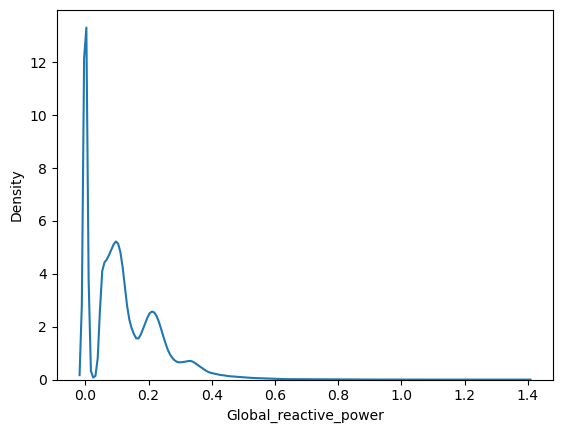

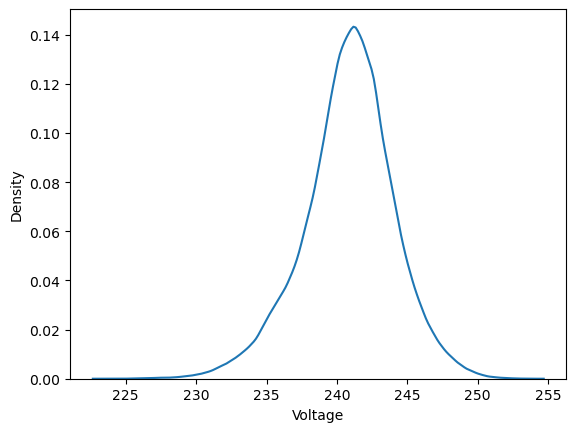

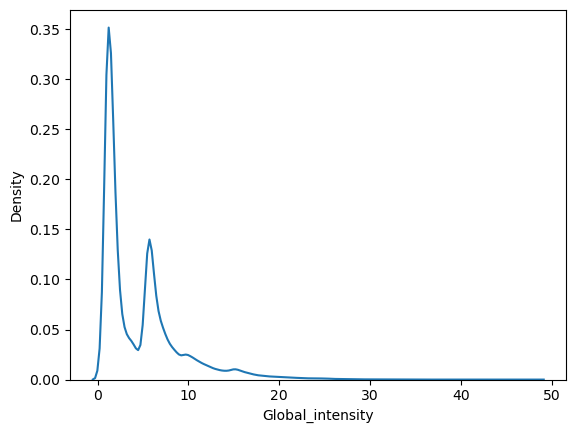

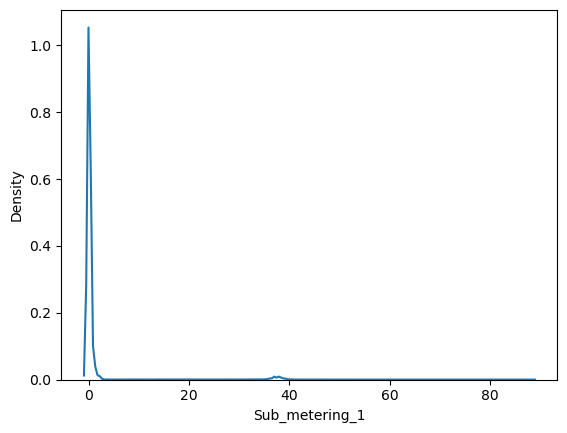

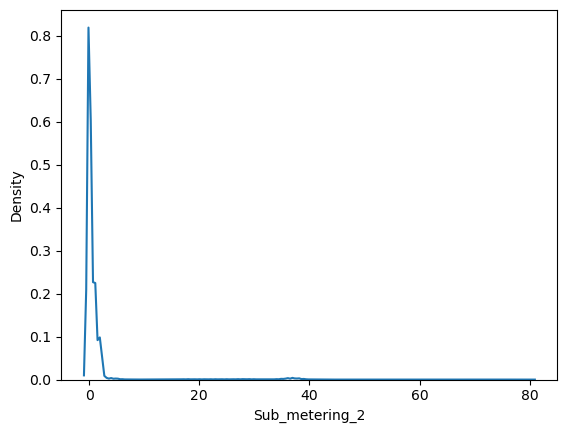

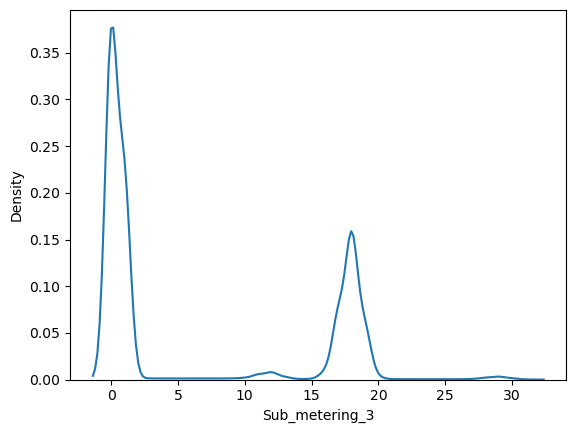

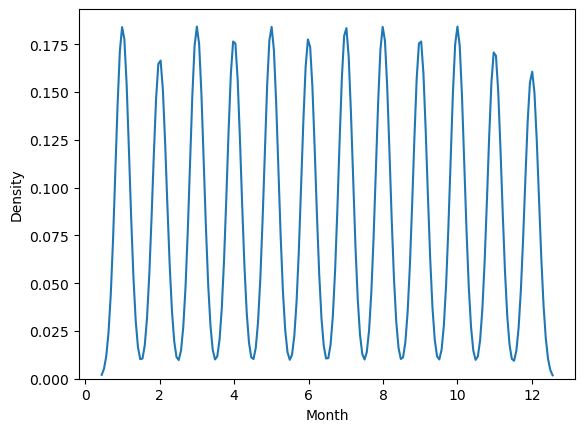

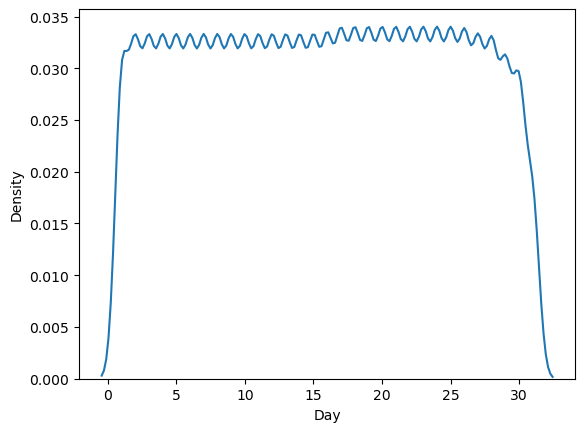

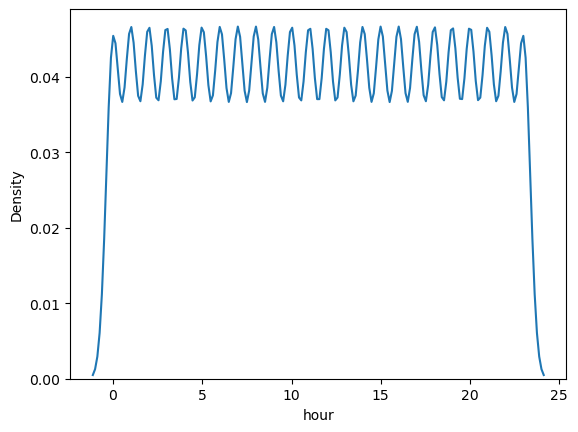

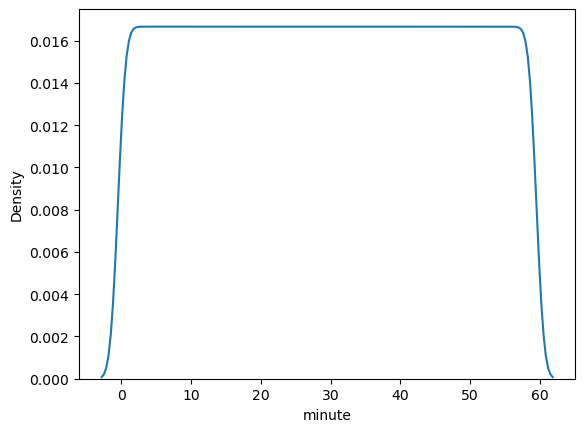

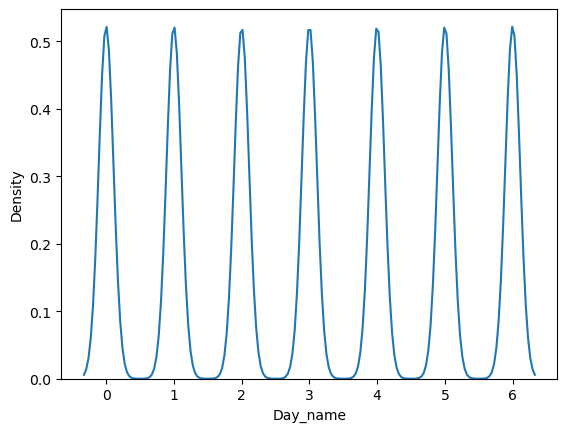

In [15]:
# Fine the distribution of value columns
for i in data.drop("Global_active_power" , axis = 1).columns:
    sns.kdeplot(data[i])
    plt.show()

In [16]:
data [["Global_reactive_power","Global_intensity"]]

,Global_reactive_power,Global_intensity
0,0.418,18.4
1,0.436,23.0
2,0.498,23.0
3,0.502,23.0
4,0.528,15.8
...,...,...
2075254,0.000,4.0
2075255,0.000,4.0
2075256,0.000,3.8
2075257,0.000,3.8


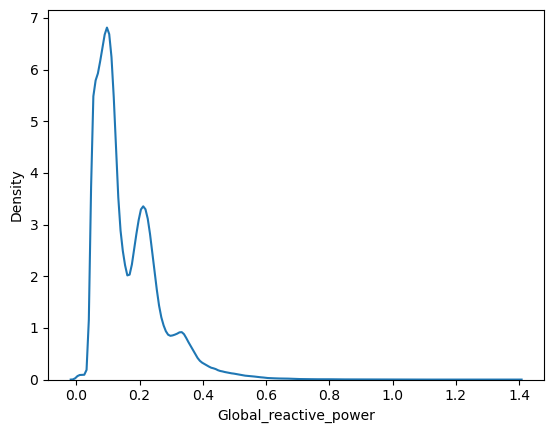

In [17]:
sns.kdeplot(data[data["Global_reactive_power"] != 0]["Global_reactive_power"])
plt.show()

In [18]:
# Control outlayer using Powertransform
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data["Global_reactive_power"] = pt.fit_transform(
    data[["Global_reactive_power"]]
)


<Axes: >

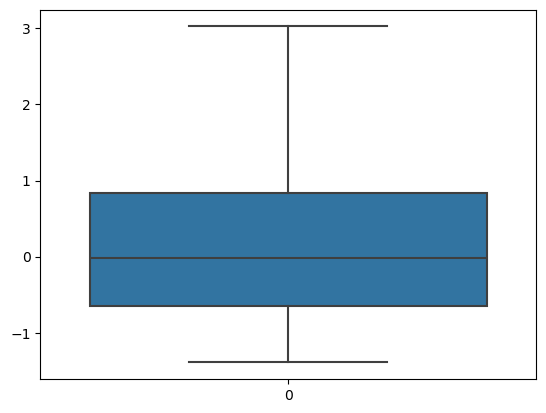

In [19]:
sns.boxplot(data["Global_reactive_power"])

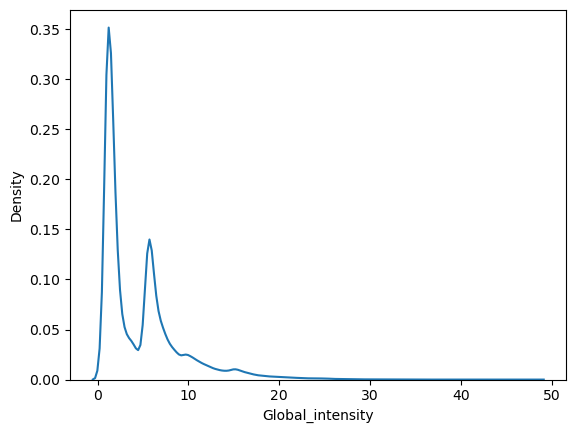

In [20]:

sns.kdeplot(data[data["Global_intensity"] != 0]["Global_intensity"])
plt.show()

<Axes: >

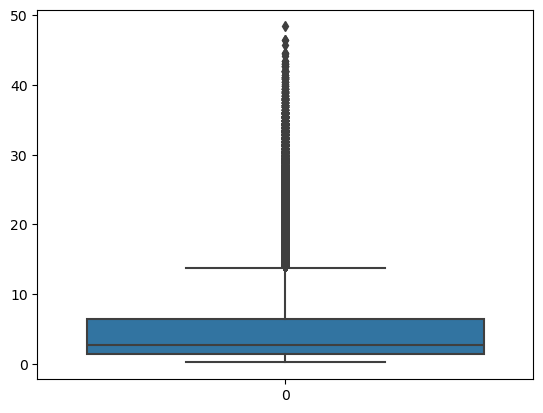

In [21]:
sns.boxplot(data["Global_intensity"])

<Axes: >

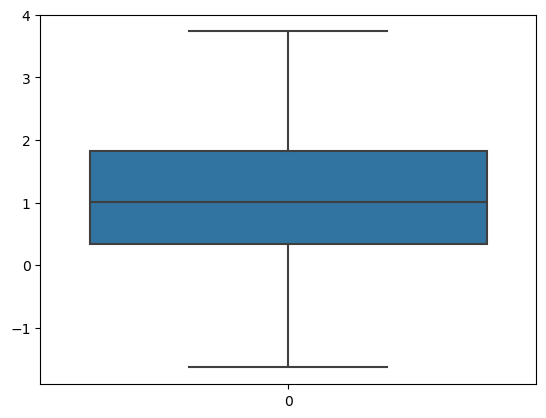

In [22]:
# control outlayer using boxcox
v,lam = stats.boxcox(data["Global_intensity"])
sns.boxplot(v)

In [23]:
# store the boxcox values to the column
data["Global_intensity"] = v

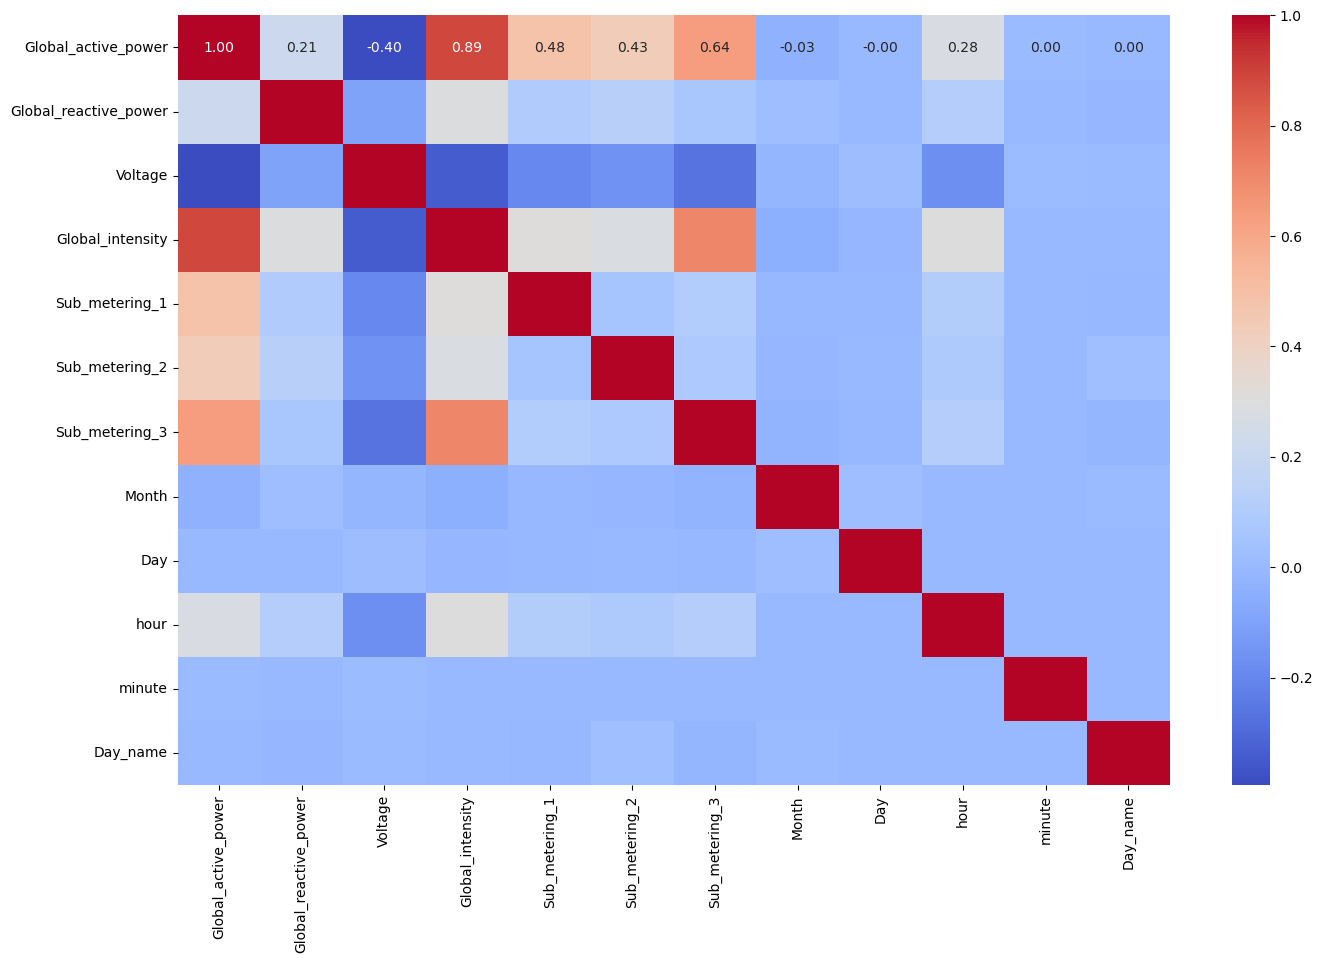

In [24]:
# Find correlation 
plt.figure (figsize= (16,10))
sns.heatmap(data.corr(),annot = True, cmap="coolwarm", fmt=".2f")
plt.show()

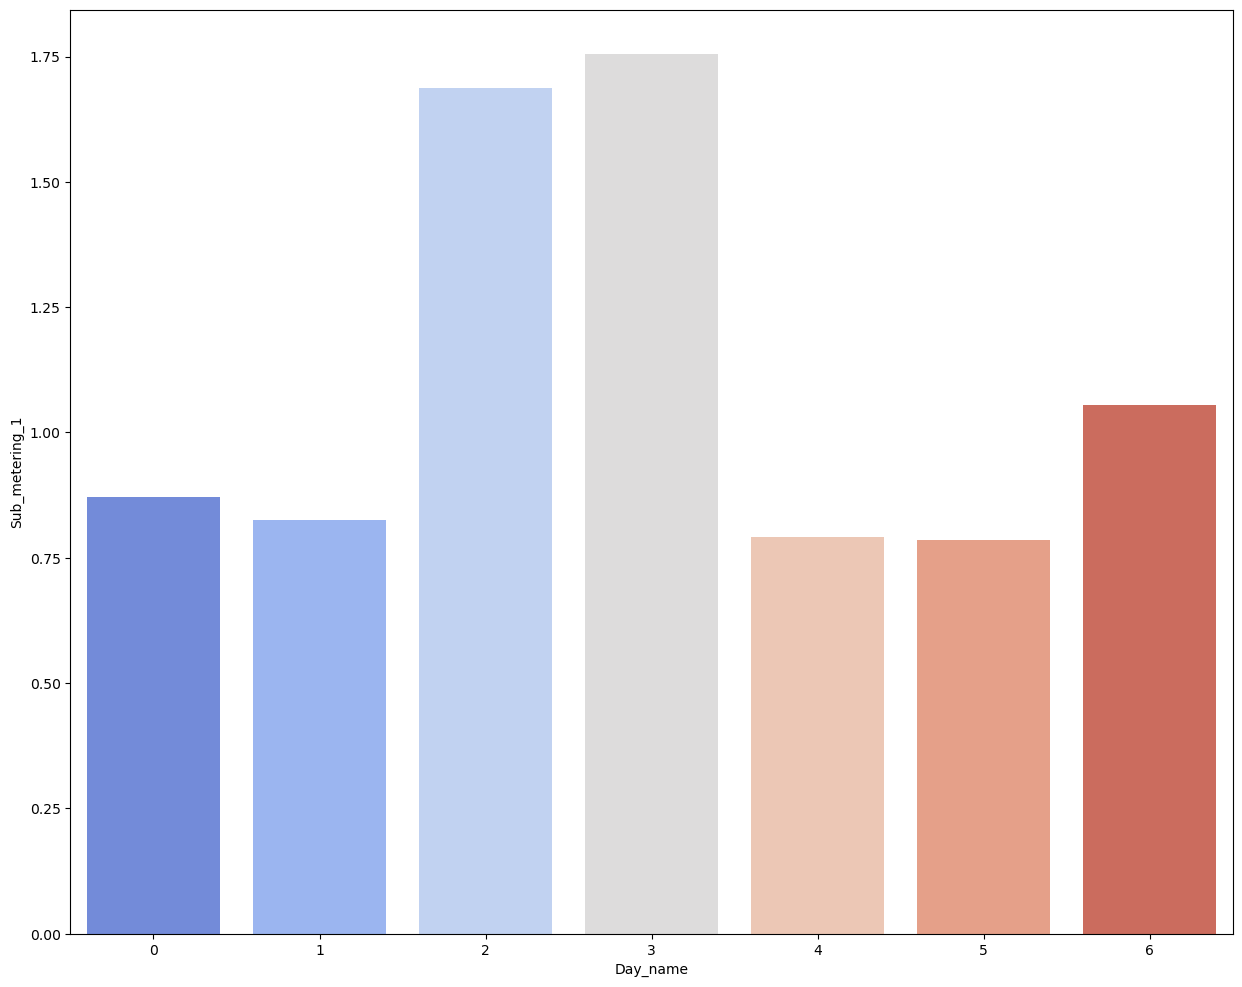

In [25]:
plt.figure(figsize = (15,12))

sns.barplot(x = data["Day_name"], y = data["Sub_metering_1"] , data = data, ci = None, palette = "coolwarm")
plt.show()

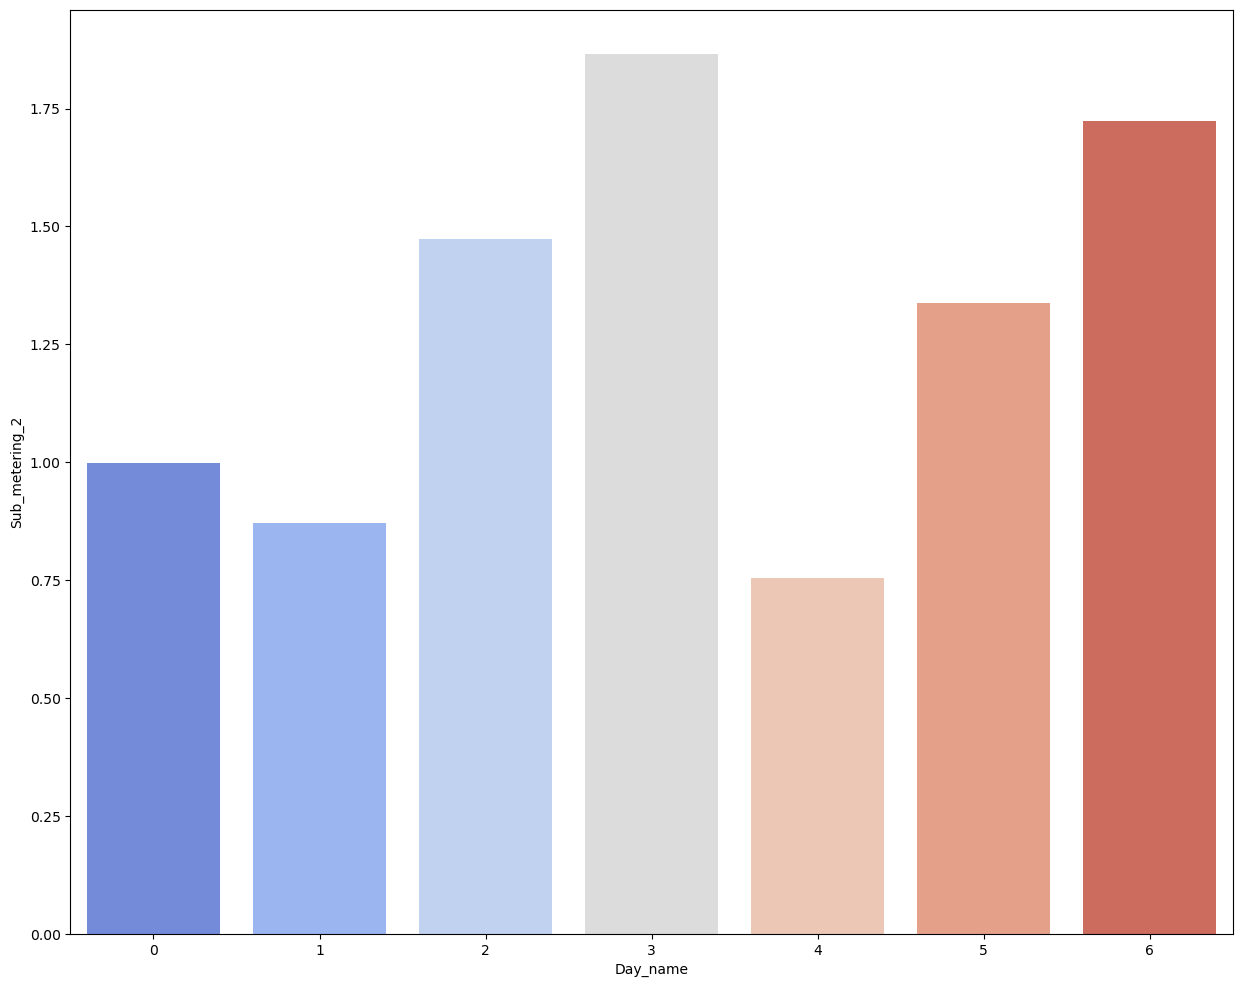

In [26]:
plt.figure(figsize = (15,12))

sns.barplot(x = data["Day_name"], y = data["Sub_metering_2"] , data = data, ci = None, palette = "coolwarm")
plt.show()

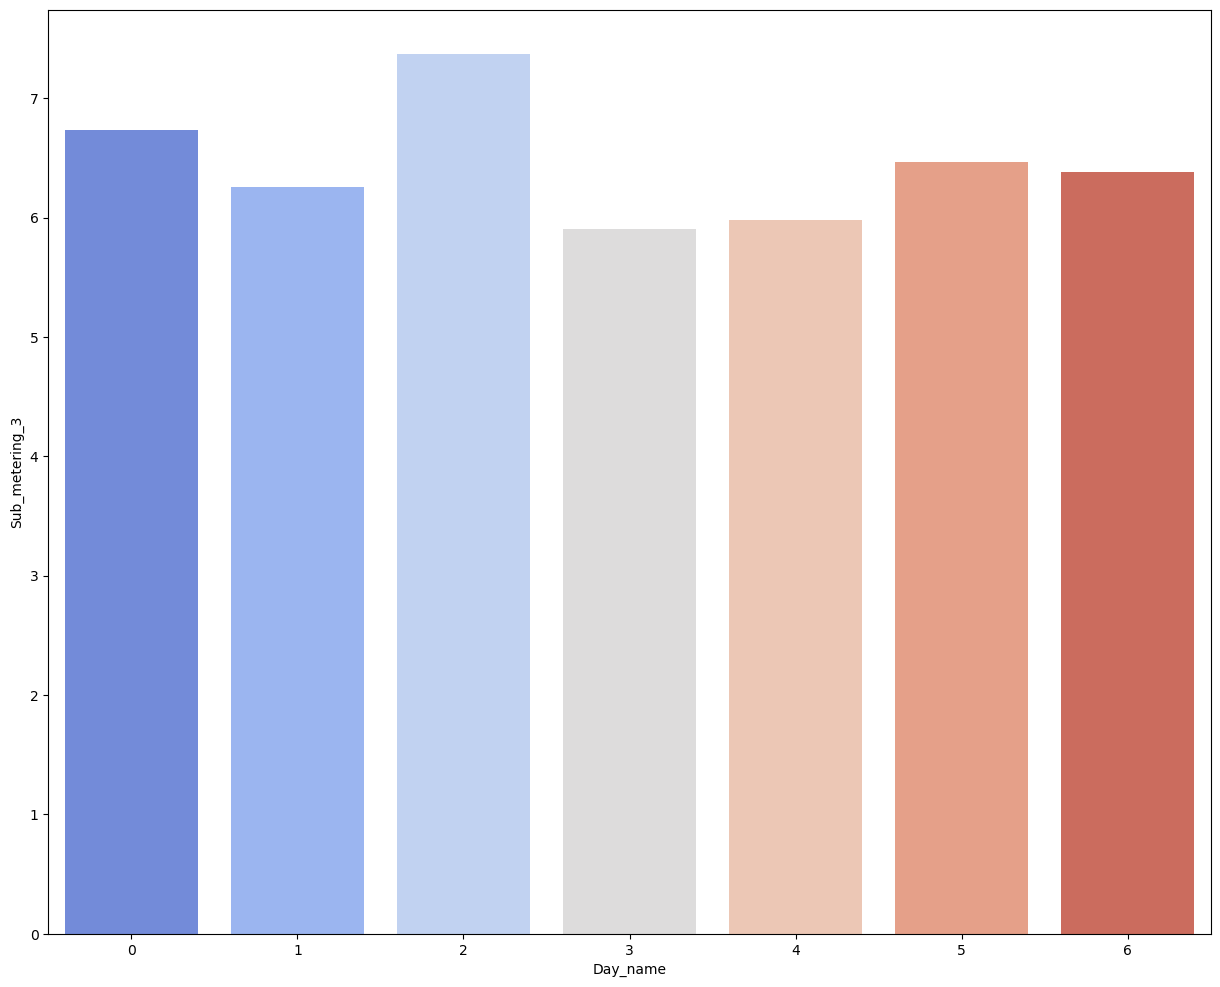

In [27]:
plt.figure(figsize = (15,12))

sns.barplot(x = data["Day_name"], y = data["Sub_metering_3"] , data = data, ci = None, palette = "coolwarm")
plt.show()

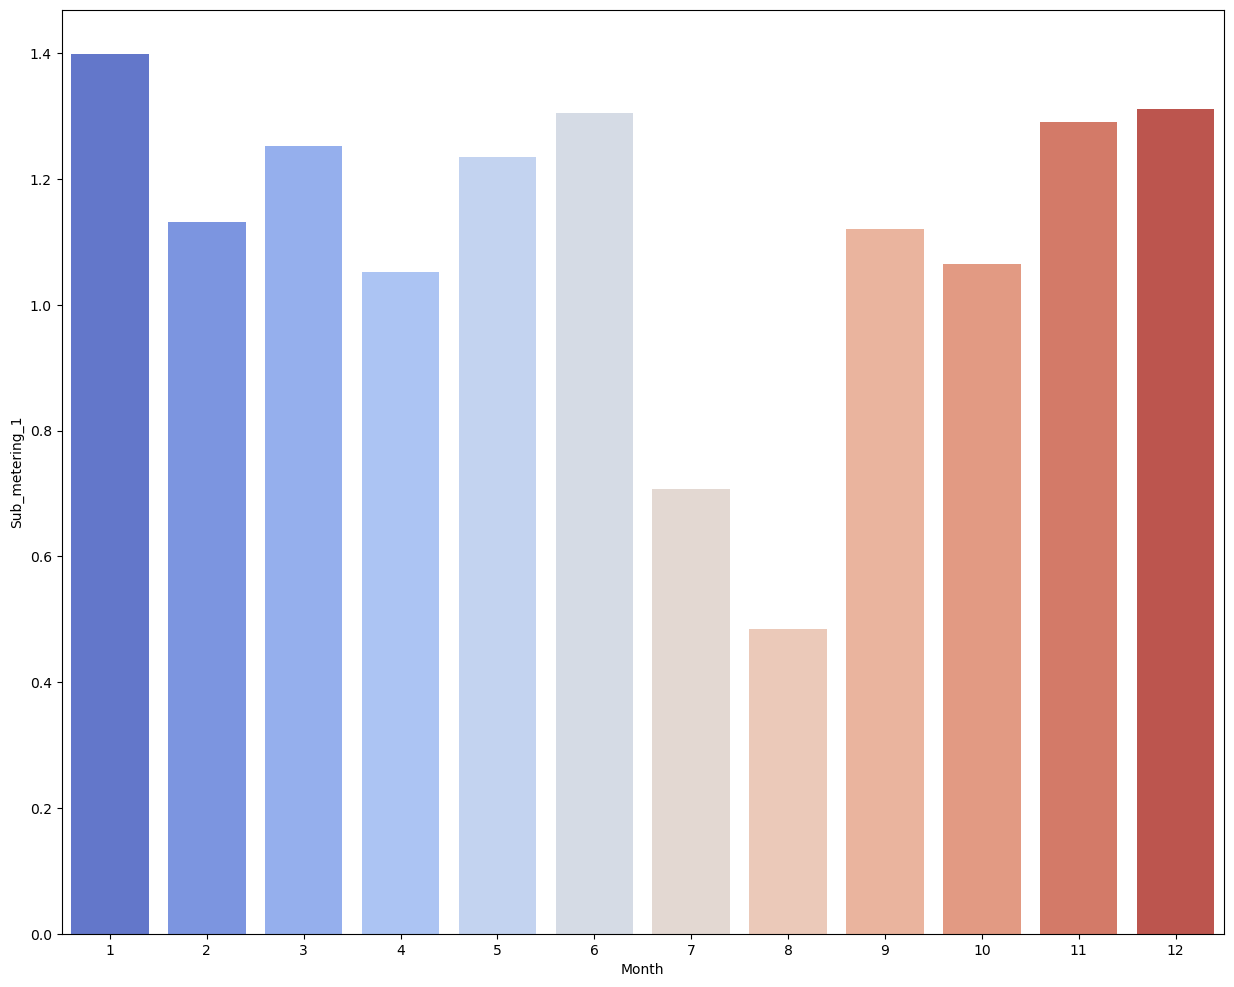

In [28]:
plt.figure(figsize = (15,12))

sns.barplot(x = data["Month"], y = data["Sub_metering_1"] , data = data, ci = None, palette = "coolwarm")
plt.show()

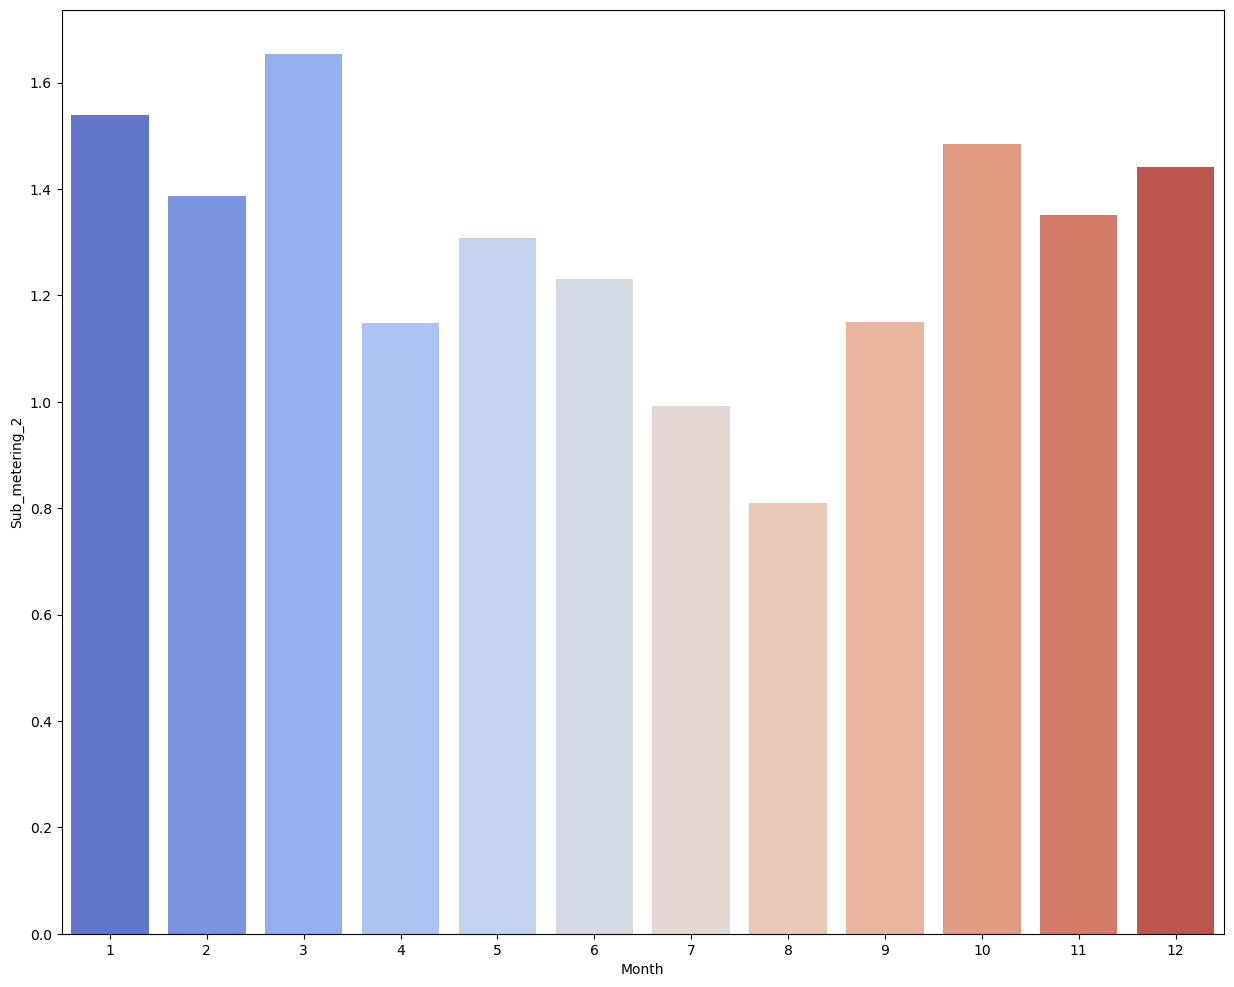

In [29]:
plt.figure(figsize = (15,12))

sns.barplot(x = data["Month"], y = data["Sub_metering_2"] , data = data, ci = None, palette = "coolwarm")
plt.show()

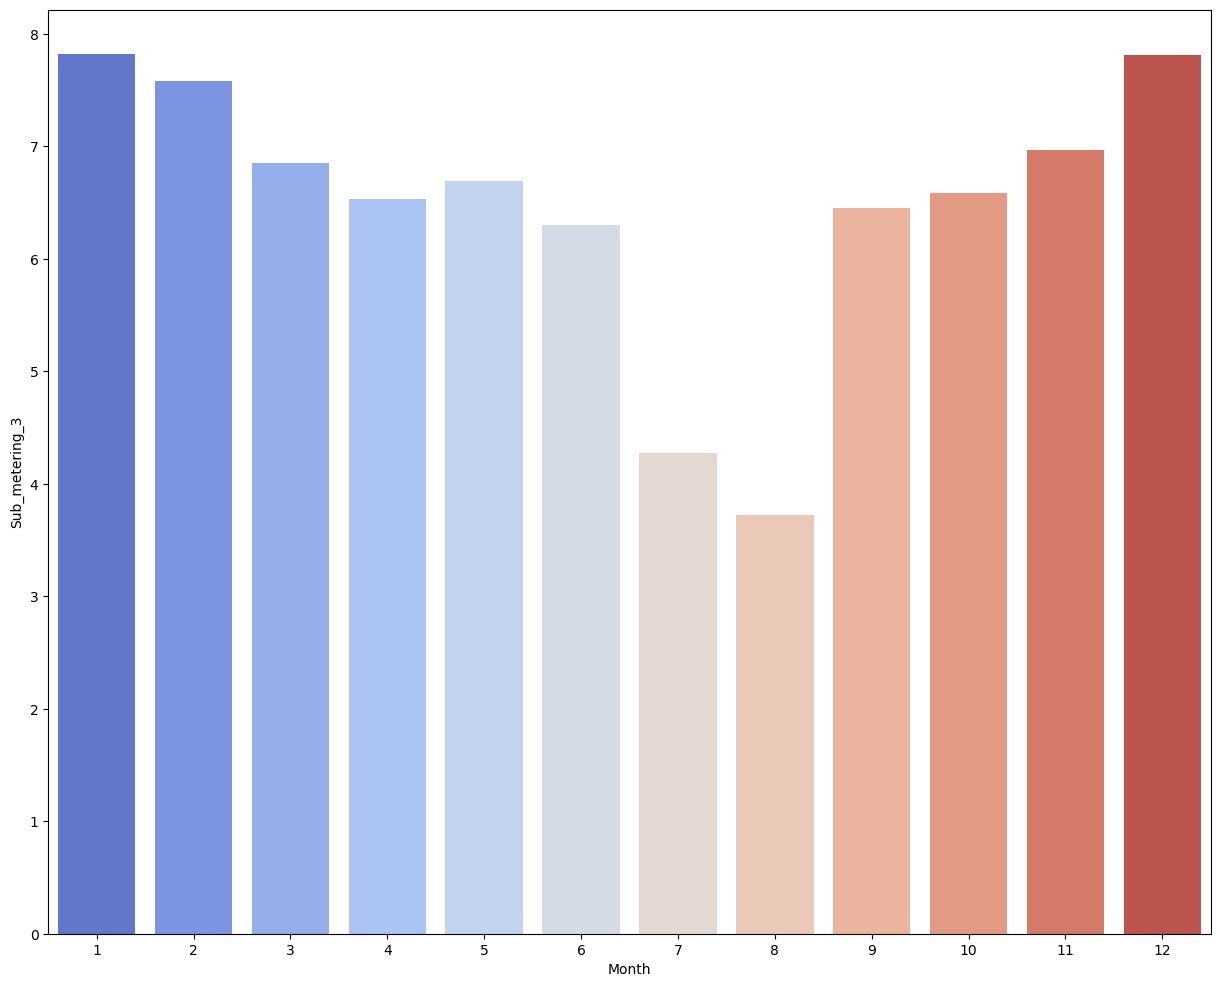

In [30]:
plt.figure(figsize = (15,12))

sns.barplot(x = data["Month"], y = data["Sub_metering_3"] , data = data, ci = None, palette = "coolwarm")
plt.show()

In [31]:
# Take the val and tar columns
val = data.drop(["Global_active_power"] , axis = 1)
tar = data["Global_active_power"]

In [32]:
# split the data
traindata,testdata,trainlab,testlab = train_test_split( val, tar, test_size =0.2 , random_state = 98)

In [33]:
# Tyoe of model
model = LinearRegression()

In [34]:
# Fir the model and train
model.fit(traindata,trainlab)

LinearRegression()

In [35]:
# predict the values
tr_pred= model.predict(traindata)
ts_pred= model.predict(testdata)

In [36]:
# Function to get 
def model_performance(act,pred):
    mse = mean_squared_error(act,pred)
    rmse = root_mean_squared_error(act,pred)
    r2 = r2_score(act,pred)

    return pd.DataFrame({
        "Mean_squared_error" : [mse],
        "Root_mean_squared_error" : [rmse],
        "R2_score" : [r2]
    })
        
    
    

In [39]:
# Fine the training perforamce
model_performance(trainlab,tr_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.119718,0.346003,0.891848


In [40]:
#  Find the testing data performance
model_performance(testlab,ts_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.118965,0.344913,0.89305


In [42]:
# Next model and their lib
from sklearn.tree import DecisionTreeRegressor

In [43]:
# Model building with parameters
dt_model = DecisionTreeRegressor(random_state = 90, max_depth = 4)
dt_model.fit(traindata,trainlab)

DecisionTreeRegressor(max_depth=4, random_state=90)

In [44]:
tr_pred= dt_model.predict(traindata)
ts_pred = dt_model.predict(testdata)

In [45]:
model_performance(trainlab,tr_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.009963,0.099815,0.991


In [46]:
model_performance(testlab,ts_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.009974,0.099869,0.991033


In [47]:
print("Train R²:", r2_score(trainlab, tr_pred))
print("Test R²:", r2_score(testlab, ts_pred))


Train R²: 0.9909995230115813
Test R²: 0.9910333923192133


In [48]:
# using GridSearch to find the best parameters
from sklearn.model_selection import GridSearchCV

In [49]:
# Parameters for Grid
para = {
    "max_depth" : [2,5,9],
    "random_state" : [56,76,45],
    "min_samples_split" : [ 10, 20,35],
    "max_features" : [3,5,4,7]
}

In [50]:
# Run the model 
dt = DecisionTreeRegressor()
gsv= GridSearchCV(param_grid = para, estimator = dt, cv= 3)
gsv.fit(traindata,trainlab)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 9], 'max_features': [3, 5, 4, 7],
                         'min_samples_split': [10, 20, 35],
                         'random_state': [56, 76, 45]})

In [51]:
# Find the best model
best_dt_model = gsv.best_estimator_

In [52]:
tr_pred= best_dt_model.predict(traindata)
ts_pred = best_dt_model.predict(testdata)

In [53]:
best_dt_model

DecisionTreeRegressor(max_depth=9, max_features=7, min_samples_split=20,
                      random_state=45)

In [54]:
model_performance(trainlab,tr_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.003065,0.05536,0.997231


In [55]:
model_performance(testlab,ts_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.003085,0.055539,0.997227


In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf_model = RandomForestRegressor(n_estimators = 100 , random_state= 74,max_depth= 5,min_samples_split = 2, n_jobs = -1)

In [58]:
rf_model.fit(traindata,trainlab)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=74)

In [59]:
tr_pred= rf_model.predict(traindata)
ts_pred =rf_model.predict(testdata)

In [60]:
model_performance(trainlab,tr_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.003799,0.061632,0.996568


In [61]:
model_performance(testlab,ts_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.003797,0.061617,0.996587


In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
gb = GradientBoostingRegressor( n_estimators = 100 , random_state = 92, max_depth = 3 , learning_rate = 0.05)

In [64]:
gb.fit(traindata,trainlab)

GradientBoostingRegressor(learning_rate=0.05, random_state=92)

In [65]:
tr_pred= gb.predict(traindata)
ts_pred = gb.predict(testdata)

In [66]:
model_performance(trainlab,tr_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.001704,0.041275,0.998461


In [67]:
model_performance(testlab,ts_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.001695,0.041173,0.998476


In [68]:
print("Train R²:", r2_score(trainlab, tr_pred))
print("Test R²:", r2_score(testlab, ts_pred))


Train R²: 0.9984609682934981
Test R²: 0.9984760043879733


In [69]:
from xgboost import XGBRegressor

In [70]:
xg= XGBRegressor(n_estimators= 150, max_depth = 4, random_state = 88)

In [71]:
xg.fit(traindata,trainlab)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:
tr_pred = xg.predict(traindata)
te_pred = xg.predict(testdata)

In [73]:
model_performance(trainlab,tr_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.000993,0.031518,0.999103


In [74]:
model_performance(testlab,ts_pred)

,Mean_squared_error,Root_mean_squared_error,R2_score
0,0.001695,0.041173,0.998476


In [75]:
print("Train R²:", r2_score(trainlab, tr_pred))
print("Test R²:", r2_score(testlab, ts_pred))


Train R²: 0.9991025948931341
Test R²: 0.9984760043879733
